In [1]:
import numpy as np
import matplotlib.pyplot as plt
from epcsaftpy import component, pcsaft
from epcsaftpy.entropy_scaling import viscosity_mix

In [2]:
R134a = component('R134a', ms = 2.154, sigma = 3.527, eps=  157.227, 
                   mupol = 2.058, xpol = 0.50, Mw = 102.031, viscosity_parameters = [-1.0273633, -1.75196, -0.17433, -0.02626])
R1234ze = component('R1234ze(E)', ms = 2.811, sigma = 3.369, eps=  176.935, 
                   mupol = 1.440, xpol = 1/3., Mw = 114.042, viscosity_parameters = [-1.1145601, -2.15343, -0.12539, 0.005379])
mix = R134a + R1234ze
eos = pcsaft(mix)

In [3]:
from pandas import read_excel

Dexp = read_excel('data_exp/R134a+R1234ze(E).xlsx', 'mix2')
x1   = 0.4982
T    = np.array(Dexp.iloc[:,0])         # K
P    = np.array(Dexp.iloc[:,1])*10      # bar
rho  = np.array(Dexp.iloc[:,2])*1e-3    # g cm-3
visc = np.array(Dexp.iloc[:,3])         # mPa s

In [4]:
# Isobaric calculation
x = np.array([x1, 1 - x1])
Tset = list(set(T.tolist()))                       # Identify the different temperature
nT = len(Tset)
Pf = 200. * 1e5
P0 = 1e4

n = 100                                            # Number of points
Pvec = np.linspace(P0, Pf, n)
Ph_cal  = np.zeros([n, nT])                        # Vector to save the information
rhoh_cal  = np.zeros([n, nT])                      # Vector to save the information
visch_cal  = np.zeros([n, nT])                     # Vector to save the information
label = []
for i in range(nT): 
    label.append(str(Tset[i]) + " K")
    for j in range(n):
        rhocal = eos.density(x, Tset[i], Pvec[j], "L") # Solving the density
        rhoh_cal[j, i] = rhocal * np.dot(x, eos.Mw)
        visch_cal[j, i] = viscosity_mix(x, rhocal, Tset[i], eos)
rhoh_cal *= 1e-6
Pvec   *= 1e-5 # Pa -> bar

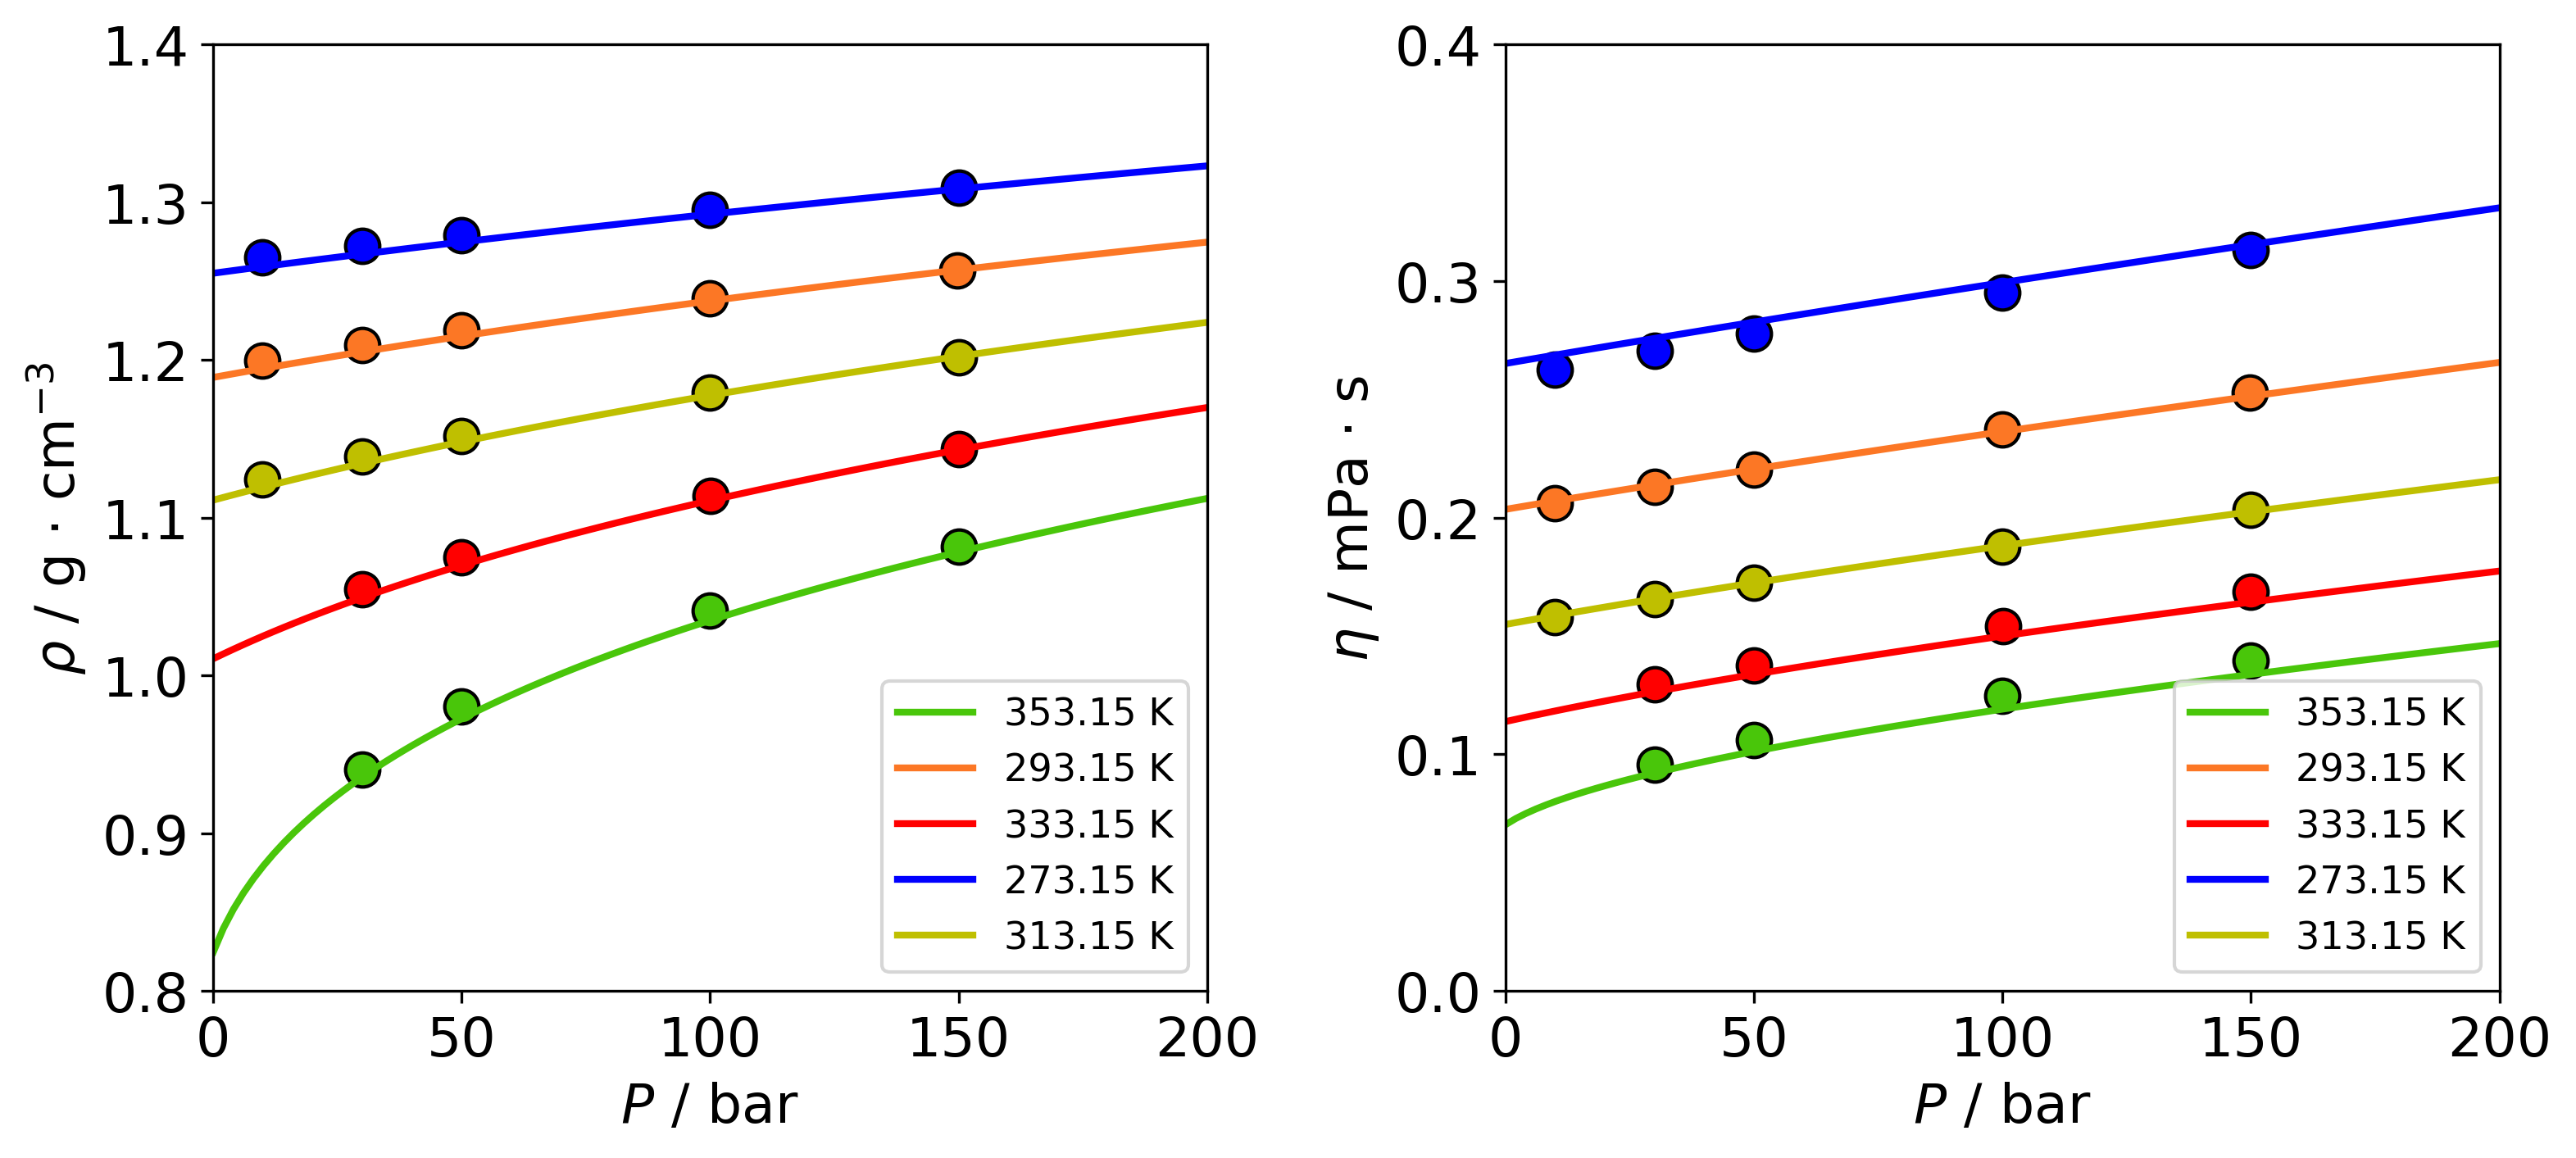

In [5]:
font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)


color1 = "#49C60A"
color2 = "#FC7725"
color3 = "r"
color4 = "b"
color5 = "y"

colors = [color1, color2, color3, color4, color5]


fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax = axs[0]
for i in range(nT):
        ax.plot(Pvec, rhoh_cal[:, i], linewidth = 2.0, label = label[i], c = colors[i])
        index = T == Tset[i]
        ax.scatter(P[index], rho[index], s = 100, marker="o", c = colors[i], 
                   linewidth=1.0, edgecolor='k')


ax.set_xlabel('$P$ / bar')
ax.set_ylabel(r'$\rho$ / g $\cdot$ cm$^{-3}$')
ax.axis([0, 200, 0.8, 1.4])



ax.legend(fontsize = "x-small")

ax = axs[1]
for i in range(nT):
        ax.plot(Pvec, visch_cal[:, i], linewidth = 2.0, label = label[i], c = colors[i])
        index = T == Tset[i]
        ax.scatter(P[index], visc[index], s = 100, marker="o", c = colors[i], 
                   linewidth=1.0, edgecolor='k')

ax.axis([0, 200, 0., 0.4])
ax.yaxis.set_ticks(np.array([0, 0.1, 0.2, 0.3, 0.4]))

ax.set_xlabel('$P$ / bar')
ax.set_ylabel(r'$\eta$ / mPa $\cdot$ s')




ax.legend(fontsize = "x-small")

plt.show()